In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of employees
num_employees = 200

# Simulation time (e.g., days)
time_period = 100

In [14]:
# Base performance level for each employee (randomly initialized between 50 and 100)
base_performance = np.random.uniform(50, 100, num_employees)
print(base_performance)


[73.90692994 64.98375181 78.2988353  57.79879347 86.21779669 96.70737878
 90.35489023 74.97275794 88.72016962 86.1987273  91.14815662 55.00564518
 69.46740687 73.21513935 80.4311085  72.30932745 89.3020448  59.64156044
 64.83408828 98.17414256 65.28519706 51.77680734 77.51433734 98.68169394
 83.61750675 84.11518008 97.22154607 70.43150661 54.36162411 74.82320567
 65.94789878 75.61262314 86.35762568 52.20215213 98.35168397 52.94005591
 88.1207133  57.57415701 57.74230511 51.98951971 68.53233888 56.624397
 76.23560553 52.21078518 62.34590737 96.63554762 79.92238593 78.88318684
 71.46671243 83.19840025 92.4336031  95.24777369 65.57893248 89.0460351
 86.53213104 67.94434394 94.70449755 73.24518436 88.85154456 87.92661603
 56.37252474 70.72193809 56.76110005 58.61699247 79.59695579 84.87292944
 67.20808828 75.26134599 92.11361481 64.64857597 60.51268895 95.89519887
 86.24915319 50.21224475 91.81636919 56.47155614 58.5290095  51.7945658
 84.59619724 87.40505955 70.89014632 97.01853479 61.079

In [4]:
# Performance matrix to store performance over time
performance = np.zeros((num_employees, time_period))
performance[:, 0] = base_performance

In [5]:
# Define a reward structure (e.g., bonus given if performance > 80)
reward_threshold = 80
reward_bonus = 10

In [6]:
def update_performance(performance, rewards):
    """
    Update performance based on previous performance and rewards.
    
    Parameters:
    performance (ndarray): Current performance matrix.
    rewards (ndarray): Rewards given to employees.

    Returns:
    ndarray: Updated performance matrix.
    """
    num_employees, time_period = performance.shape
    for t in range(1, time_period):
        for i in range(num_employees):
            # Simple model: next performance is influenced by previous performance
            performance[i, t] = performance[i, t-1]
            
            # If employee received a reward, boost performance
            if performance[i, t-1] > reward_threshold:
                performance[i, t] += reward_bonus * rewards[i, t-1]
            
            # Random fluctuation to simulate real-world variability
            performance[i, t] += np.random.normal(0, 5)
            
            # Ensure performance stays within realistic bounds
            performance[i, t] = max(0, min(performance[i, t], 100))
    
    return performance


In [8]:
# No rewards given initially
rewards_no = np.zeros((num_employees, time_period))

# Simulate performance without rewards
performance_no_rewards = update_performance(performance.copy(), rewards_no)

In [9]:
# Initialize rewards (1 if performance > reward_threshold, else 0)
rewards_with = np.zeros((num_employees, time_period))


In [15]:
for t in range(1, time_period):
    rewards_with[:, t] = (performance[:, t-1] > reward_threshold).astype(int)

# Simulate performance with rewards
performance_with_rewards = update_performance(performance.copy(), rewards_with)
print(performance_with_rewards)

[[ 80.7947458   77.89218278  71.23110405 ...  43.11366552  50.6522632
   44.88086372]
 [ 93.04990595  97.13557521 100.         ...  26.79121939  18.82470753
   17.06113755]
 [ 94.24261072  92.85334921 100.         ...  51.63739821  48.31440755
   44.47066557]
 ...
 [ 93.09762001  98.98362643 100.         ...  60.31733327  63.80909951
   69.09781601]
 [ 87.11660637  80.65417078  87.7115813  ...  83.5766135   80.4042016
   86.07457057]
 [ 82.13182096  87.53446028  95.13528673 ...  10.74400221  20.02840512
   14.93301039]]


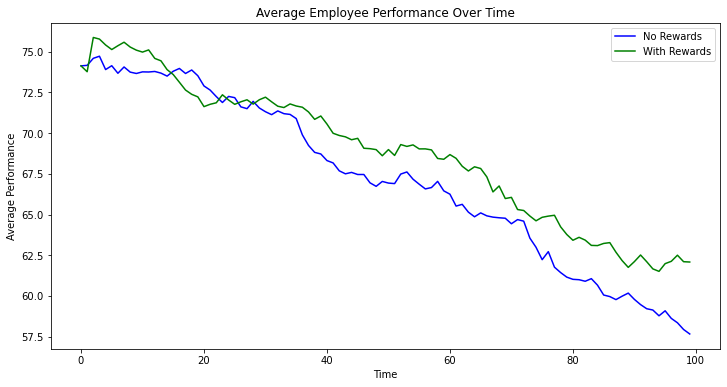

In [13]:
# Average performance over time (line plot)
avg_performance_no_rewards = performance_no_rewards.mean(axis=0)
avg_performance_with_rewards = performance_with_rewards.mean(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(avg_performance_no_rewards, label='No Rewards', color='blue')
plt.plot(avg_performance_with_rewards, label='With Rewards', color='green')
plt.title('Average Employee Performance Over Time')
plt.xlabel('Time')
plt.ylabel('Average Performance')
plt.legend()
plt.show()